## Assignment-6
### Pradeep Mundlik (AI21BTECH11022)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import emcee
import corner
import scipy.optimize as op
from astroML.plotting import plot_mcmc
import seaborn as sns
sns.set()

In [38]:
arXiv = [[1, 201, 592, 61 ],[2, 244, 401, 25 ],[3, 47, 583, 38 ],[4, 287, 402, 15 ],
        [5, 203, 495, 21 ],[6, 58, 173, 15 ],[7, 210, 479, 27 ],[8, 202, 504, 14 ],
        [9, 198, 510, 30 ],[10, 158, 416, 16 ],[11, 165, 393, 14 ],[12, 201, 442, 25 ],
        [13, 157, 317, 52 ],[14, 131, 311, 16 ],[15, 166, 400, 34 ],[16, 160, 337, 31 ],
        [17, 186, 423, 42 ],[18, 125, 334, 26 ],[19, 218, 533, 16 ],[20, 146, 344, 22 ]]
arXiv = np.array(arXiv)

### Q-1

In [39]:
# Define the Gaussian likelihood function
def gaussian_likelihood(theta, x, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - theta)**2 / (2 * sigma**2))

# Predicted values
theta_GR = 1.74  # General Relativity
theta_NG = theta_GR / 2  # Newtonian gravity

# Observed values and errors
x_Eddington = 1.61
sigma_Eddington = 0.40
x_Crommelin = 1.98
sigma_Crommelin = 0.16

# Calculate the likelihoods
L_Eddington_GR = gaussian_likelihood(theta_GR, x_Eddington, sigma_Eddington)
L_Eddington_NG = gaussian_likelihood(theta_NG, x_Eddington, sigma_Eddington)
L_Crommelin_GR = gaussian_likelihood(theta_GR, x_Crommelin, sigma_Crommelin)
L_Crommelin_NG = gaussian_likelihood(theta_NG, x_Crommelin, sigma_Crommelin)

# Calculate the Bayes factors
B_10_Eddington = L_Eddington_GR / L_Eddington_NG
B_10_Crommelin = L_Crommelin_GR / L_Crommelin_NG

# Print the results
print('Eddington Bayes factor:', B_10_Eddington)
print('Crommelin Bayes factor:', B_10_Crommelin)

print(f"The Bayes Factor for the models of Einstein and Netwon are {B_10_Crommelin/B_10_Eddington} in favour of Einstein's model.")


Eddington Bayes factor: 5.251099587967161
Crommelin Bayes factor: 9172292802.960835
The Bayes Factor for the models of Einstein and Netwon are 1746737545.0237215 in favour of Einstein's model.


### Q-2

In [40]:
x = arXiv[:,1][4:]
y = arXiv[:,2][4:]
sigma = arXiv[:,3][4:]

In [41]:
def log_prior(param):
    a, b, c = param
    if c>= 0.0 :
        return -1.5*np.log((1+b**2)/c)
    return -np.inf

def log_likelihood(param, x, y, sigma):
    a, b, c = param
    model = a + b*x
    return -0.5*np.sum(np.log(2*np.pi*c**2) + (y - model)**2/c**2)

def log_posterior(param, x, y, sigma):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(param, x, y, sigma)

In [42]:
n_dim = 3
n_walkers = 50
n_burn = 1000
n_steps = 2000

pos = np.random.normal(0,1,(n_walkers, n_dim))
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(x,y,sigma))
sampler.run_mcmc(pos, n_steps)
emcee_trace = sampler.chain[:, n_burn:, :].reshape((-1, n_dim)).T

/home/pradeep/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


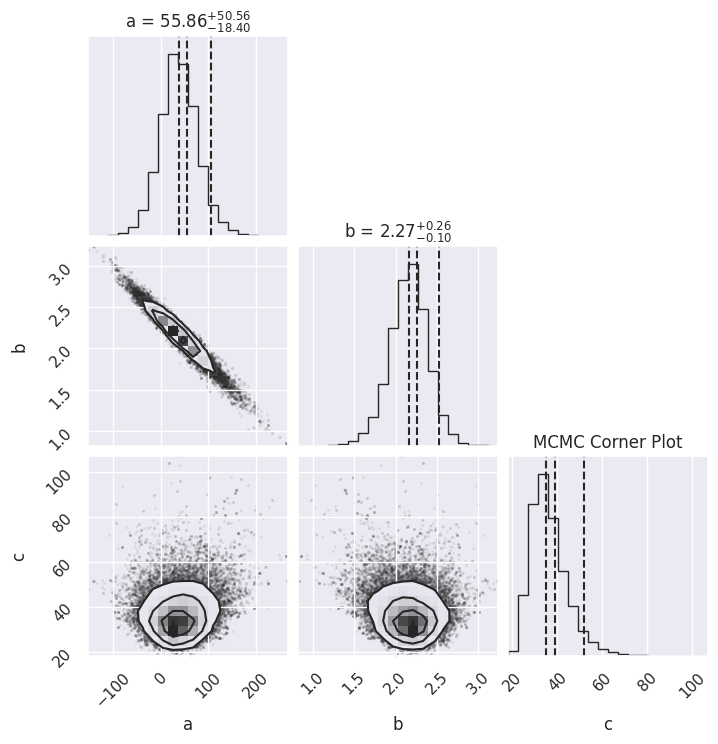

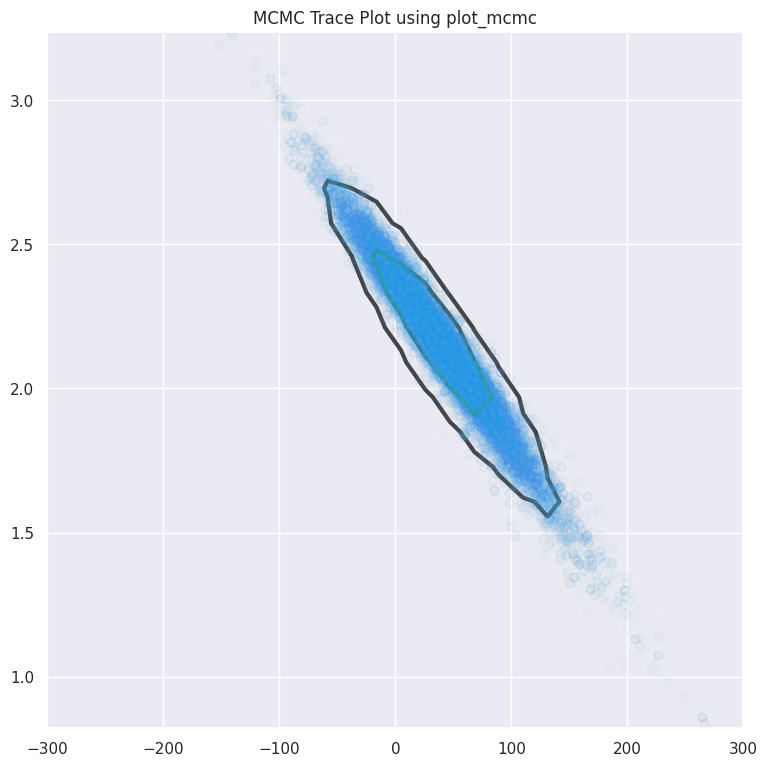

In [43]:
corner.corner(emcee_trace.T, labels=["a", "b", "c"], quantiles=[0.5,0.68, 0.95], show_titles=True, title_kwargs={"fontsize": 12})
plt.title("MCMC Corner Plot")
plt.show()

fig = plot_mcmc(emcee_trace[:2 , :] , colors = 'k' , linewidths = [3,3] , alpha = 0.80)
plt.plot(emcee_trace.T[:,0] , emcee_trace.T[:,1] , 'o' , alpha = 0.02, markeredgecolor = '#1497E5',markerfacecolor = 'skyblue')
plt.xlim(-300 , 300)
plt.title("MCMC Trace Plot using plot_mcmc")
plt.show()

### Q-3

In [44]:
def log_likelihood(theta, x, y, sigma_y):
    a, b = theta
    model = a * x + b
    return -0.5 * np.sum((y - model)**2 / sigma_y**2)

def log_prior(theta, sigma_b):
    a, b = theta
    return -0.5 * np.sum(b**2 / sigma_b**2)

def log_posterior(theta, x, y, sigma_y, sigma_b):
    lp = log_prior(theta, sigma_b)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, sigma_y)


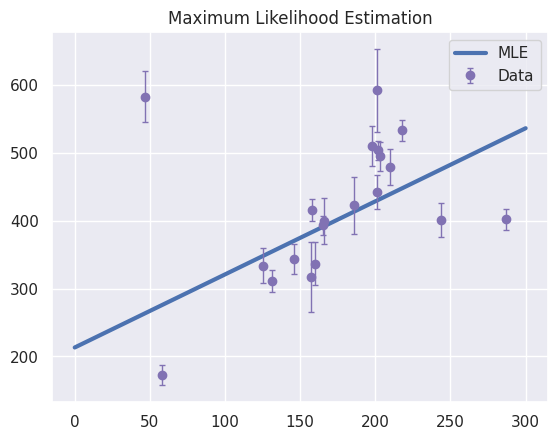

In [45]:
# Include all data points
x = arXiv[:,1]
y = arXiv[:,2]
sigma = arXiv[:,3]

# Maximum Likelihood Analysis
def line(x, a, b):
    return a * x + b

# Optimize using MSE as the loss function, write loss funtion and then use scipy.optimize.fmin
def loss(theta, x, y, sigma):
    return np.sum((y - (line(x, *theta)))**2 / sigma**2)

popt = op.fmin(loss, [0, 0], args=(x, y, sigma), disp = False)

x_val = np.linspace(0, 300, 1000)
y_val = popt[1] + popt[0]*x_val

plt.plot(x_val, y_val, linewidth=3)
plt.errorbar(x, y, yerr=sigma, fmt='o', elinewidth=1, capsize=2, color='m', ecolor='m')
plt.title("Maximum Likelihood Estimation")
plt.legend(["MLE", "Data"])
plt.show()

In [47]:
# Bayesian Analysis
n_dim = 2
n_walkers = 50
n_burn = 15000
n_steps = 25000

pos = np.random.normal(0,1,(n_walkers, n_dim))
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(x,y,sigma,50))
sampler.run_mcmc(pos, n_steps)
emcee_trace = sampler.chain[:, n_burn:, :].reshape((-1, n_dim)).T

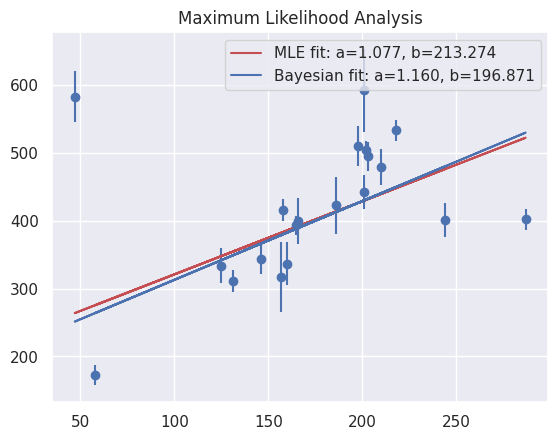

In [48]:
# Plotting
plt.errorbar(x, y, yerr=sigma, fmt='o')
plt.plot(x, line(x, *popt), 'r-', label='MLE fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(x, line(x, emcee_trace[0].mean(), emcee_trace[1].mean()), 'b-', label='Bayesian fit: a=%5.3f, b=%5.3f' % (emcee_trace[0].mean(), emcee_trace[1].mean()))
plt.title('Maximum Likelihood Analysis')
plt.legend()
plt.show()